In [1]:
# Import relevant modules.

import matplotlib.pyplot as plt
import numpy as np

from clusterer import max_data_size, TwitterKMeans
from data import documents, model, update_size
from tweet_preprocessor import preprocess

In [2]:
# Define variables and methods.

num_iterations = 50

def update_indices(init_clusters):
    global from_idx, to_idx, twitter_kmeans
    
    to_idx += update_size
    if to_idx > len(documents.index):
        from_idx = 0
        to_idx = max_data_size

        twitter_kmeans = TwitterKMeans(model, init_clusters=init_clusters)
    else:
        from_idx += update_size

def cluster(init_clusters):
    docs = documents.iloc[from_idx:to_idx].copy()
    update_indices(init_clusters)
    while len(docs.index) == 0:
        docs = documents.iloc[from_idx:to_idx].copy()
        update_indices(init_clusters)

    twitter_kmeans.cluster(docs)
    
    return twitter_kmeans.eval_results()

In [3]:
# Perform stream clustering.

init_clusters_range = [2, 3, 4, 5, 6, 7, 8]
results = {'davies_bouldin_score': [], 'silhouette_score': [], 'max_silhouette_score': [], 'min_silhouette_score': []}
davies_bouldin_trends = []
silhouette_score_trends = []

for idx, init_clusters in enumerate(init_clusters_range):
    np.random.seed(1)
    
    print(init_clusters, 'starting clusters')
    print()
    from_idx, to_idx = 0, update_size
    twitter_kmeans = TwitterKMeans(model, init_clusters=init_clusters)
    davies_bouldin_trend = []
    silhouette_score_trend = []
    
    print("Clustering: 0/{} iteration...".format(num_iterations), end="\r")
    results['silhouette_score'].append(-1.0)
    for i in range(num_iterations):
        davies_bouldin_score, silhouette_score, silhouette_scores = cluster(init_clusters)
        
        davies_bouldin_trend.append(davies_bouldin_score)
        silhouette_score_trend.append(silhouette_score)
        if silhouette_score > results['silhouette_score'][idx]:
            results['davies_bouldin_score'].append(davies_bouldin_score)
            results['silhouette_score'][idx] = silhouette_score
            results['max_silhouette_score'].append(max(silhouette_scores))
            results['min_silhouette_score'].append(min(silhouette_scores))
        
        print("Clustering: {}/{} iterations...".format(i + 1, num_iterations), end="\r")
    print("Clustering: {}/{} iterations...".format(num_iterations, num_iterations))
    
    davies_bouldin_trends.append(davies_bouldin_trend)
    silhouette_score_trends.append(silhouette_score_trend)
    
    print()
    print('Davies-Bouldin score:', results['davies_bouldin_score'][idx])
    print('Silhouette score:', results['silhouette_score'][idx])
    print('Silhouette max:', results['max_silhouette_score'][idx])
    print('Silhouette min:', results['min_silhouette_score'][idx])
    print()
    print('---------------------------------------------')

2 starting clusters

Clustering: 50/50 iterations...

Davies-Bouldin score: 1.1244042858982015
Silhouette score: 0.41463485461071725
Silhouette max: 0.330798210851734
Silhouette min: 0.29064963329286964

---------------------------------------------
3 starting clusters

Clustering: 50/50 iterations...

Davies-Bouldin score: 0.9787367533942515
Silhouette score: 0.40339220092186306
Silhouette max: 0.5389114590238849
Silhouette min: 0.29535864625206776

---------------------------------------------
4 starting clusters

Clustering: 50/50 iterations...

Davies-Bouldin score: 0.9819406267723538
Silhouette score: 0.43221158232324836
Silhouette max: 0.5446105475593439
Silhouette min: 0.2769762075712821

---------------------------------------------
5 starting clusters

Clustering: 50/50 iterations...

Davies-Bouldin score: 0.971722850671385
Silhouette score: 0.37742658636018683
Silhouette max: 0.5288684572842277
Silhouette min: 0.27166247491573975

---------------------------------------------

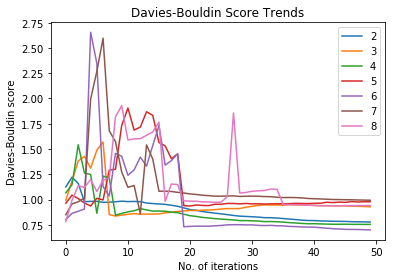

In [6]:
# Plot Davies-Bouldin Score Trends.

plt.figure(1)
for idx, init_clusters in enumerate(init_clusters_range):
    plt.plot(range(num_iterations), davies_bouldin_trends[idx], label=str(init_clusters))
plt.title('Davies-Bouldin Score Trends')
plt.xlabel('No. of iterations')
plt.ylabel('Davies-Bouldin score')
plt.legend(loc='upper right')

plt.show()

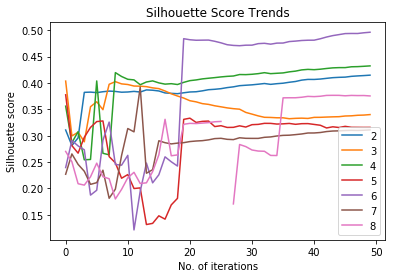

In [7]:
# Plot Silhouette Score Trends.

plt.figure(2)
for idx, init_clusters in enumerate(init_clusters_range):
    plt.plot(range(num_iterations), silhouette_score_trends[idx], label=str(init_clusters))
plt.title('Silhouette Score Trends')
plt.xlabel('No. of iterations')
plt.ylabel('Silhouette score')
plt.legend(loc='lower right')

plt.show()